<a href="https://colab.research.google.com/github/Aleksandra2002/obliczenia_naukowe/blob/main/MiSS_symulacja_robocza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math

x0 =0 #float(input('podaj x srodka okregu: '))
y0 = 0 #float(input('podaj y srodka okregu: '))
R = 2 #float(input('podaj promien okregu duzego: '))
r =1 #float(input('podaj promien okregu malego: ')) 
l= 1 #float(input('podaj dlugosc odcinka l: '))
n= 10 #int(input('podaj liczbę rzuconych odcinków: '))

dokladnosc = 0.01
kat = np.arange(0, 2*np.pi, dokladnosc)
 
x = x0 + R * np.cos(kat)
y = y0 + R * np.sin(kat)
x1 = x0 + r * np.cos(kat)
y1 = y0 + r * np.sin(kat)

srodki_xs =[]
srodki_ys=[]

def odleglosc(xs,ys):
  if math.sqrt((xs-x0)**2+(ys-y0)**2) < R and  math.sqrt((xs-x0)**2+(ys-y0)**2)>r:
    return xs,ys
  else:
    xs = round(np.random.uniform(x0-R,x0+R),2)
    ys= round(np.random.uniform(y0-R,y0+R),2)
  return xs,ys
  
for i in range(0,n):
  xs = round(np.random.uniform(x0-R,x0+R),2)
  ys = round(np.random.uniform(y0-R,y0+R),2)
  srodki_xs.append(xs)
  srodki_ys.append(ys)

for i in range (0,n):
  srodki_xs[i], srodki_ys[i] = odleglosc(srodki_xs[i],srodki_ys[i])

In [12]:
#podstawowe fakty, definicje i związki między nimi
#16 lutego nie

In [13]:
#TWORZYMY y=ax+b
#losujemy kąt alfa
alfy=[]
for i in range(0,n):
  alfy.append(np.random.uniform(0,180))

#współczynnik kierunkowy prostej to a
a_list=[]
for i in range (0,n):
  a_list.append(round(math.tan(alfy[i]),2))

#szukamy współczynnika b
b_list=[]
for i in range (0,n):
  b_list.append(round(srodki_ys[i]-a_list[i]*srodki_xs[i],2))

In [14]:
#szukamy końców odcinka A(xi1,yi1) i B(xi2,yi2)
#from sympy import symbols, Eq, solve
import sympy
xi1_list=[]
xi2_list=[]
yi1_list=[]
yi2_list=[]
for i in range (0,n):
  xi=symbols('xi')
  row=Eq((sympy.sqrt((srodki_xs[i]-xi)**2+(srodki_ys[i]-(a_list[i]*xi+b_list[i]))**2))-l/2,0)
  sol=solve(row)
  xi1_list.append(sol[0])
  xi2_list.append(sol[1])
  yi1_list.append(a_list[i]*xi1_list[i]+b_list[i])
  yi2_list.append(a_list[i]*xi2_list[i]+b_list[i])

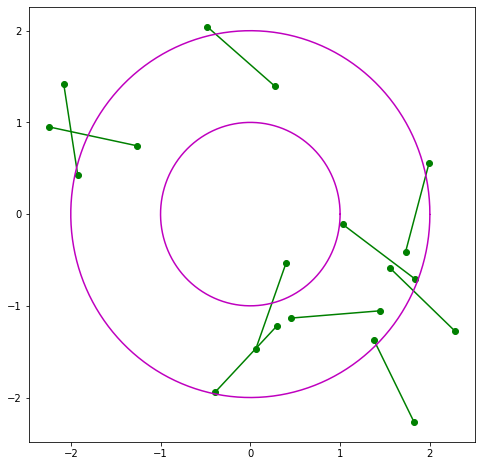

In [15]:
odcinek_x_list=[]
odcinek_y_list=[]
plt.figure(figsize=(8, 8)) 
for i in range (0,n):
  odcinek_x_list.append([xi1_list[i],xi2_list[i]])
  odcinek_y_list.append([yi1_list[i],yi2_list[i]])
  plt.plot(xi1_list[i],yi1_list[i],'go')
  plt.plot(xi2_list[i],yi2_list[i],'go')
  plt.plot(odcinek_x_list[i],odcinek_y_list[i],'g-')
plt.plot(x, y, 'm-')
plt.plot(x1, y1, 'm-')
#plt.plot(odcinek_x_list,odcinek_y_list,'g-')
#plt.plot(xi1_list,yi1_list,'go')
#plt.plot(xi2_list,yi2_list,'go')
plt.show()